32GB or larger RAM and CPU of core i7/i9 or XEON quivalent is preferred

In [1]:
getwd(); setwd("SCENIC_HB_neuron")

[1] "/home/garret/Documents/R code/SCENIC"

In [2]:
#library(GEOquery) # just in case
library(data.table)

library(Seurat)
library(dplyr)
library(magrittr)

library(SingleCellExperiment)
library("feather")
library("foreach")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplic

In [7]:
getwd()

[1] "/home/garret/Documents/R code/SCENIC/SCENIC_HB_neuron"

In [15]:
LHb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_integrated_0.8.rds")
cntl<-readRDS("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/cntl_0.8.rds")
stim<-readRDS("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/stim_0.8.rds")
new.ident <- c("MHb1","MHb2","MHb3","LHb1","LHb2","LHb3","MHb4","LHb4","MHb5","LHb5","LHb6","MHb6","Surr1","Surr2","Surr3","Surr4")
names(x = new.ident) <- levels(x =LHb.integrated)
LHb.integrated<- RenameIdents(object =LHb.integrated, new.ident)

# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LHb.integrated@assays$RNA@data[,which(Idents(object=LHb.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_cntl",sep=""),intersect(colnames(cntl@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_stim",sep=""),intersect(colnames(stim@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))}

In [5]:
LHb.integrated<-subset(x=LHb.integrated,cells=c(MHb1_barcode,MHb2_barcode,MHb3_barcode,LHb1_barcode,LHb2_barcode,LHb3_barcode,MHb4_barcode,MHb5_barcode,LHb4_barcode,LHb5_barcode,MHb6_barcode,LHb6_barcode))

In [6]:
for (i in 1:dim(LHb.integrated@meta.data)[1]){LHb.integrated@meta.data$idents[i]<-as.character(Idents(LHb.integrated)[[i]])}
as.factor(LHb.integrated@meta.data$idents)

exprMatrix <- as.matrix(LHb.integrated@assays$RNA@data) # getassaydata is the same as @data

exprMatrix[1:5,1:4]

[1] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [15] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [29] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [43] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [57] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [71] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [85] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [99] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [113] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [127] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [141] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [155] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [169] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [183] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [197] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [211] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [225] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [239] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [253] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [267] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [281] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [295] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [309] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [323] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [337] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [351] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [365] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [379] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [393] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [407] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [421] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [435] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [449] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [463] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [477] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [491] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [505] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [519] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [533] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [547] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [561] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [575] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [589] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [603] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [617] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [631] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [645] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [659] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [673] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [687] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [701] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [715] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2

,AACACGTGTGGCAAACcntl,AACCGCGGTAGGCATGcntl,AACCGCGTCGACCAGCcntl,AACTCCCCAAAGCAATcntl
Xkr4,0,0,0.00000,0
Sox17,0,0,0.00000,0
Mrpl15,0,0,0.00000,0
Lypla1,0,0,0.00000,0
Tcea1,0,0,1.44964,0


In [8]:
cellLabels<-as.data.frame(LHb.integrated@meta.data$idents,row.names=rownames(LHb.integrated@meta.data),col.names="CellType")        
#dim(exprMatrix)
#exprMatrix <- exprMatrix[unique(rownames(exprMatrix)),] # Remove duplicated rows, you do not need it 
dim(exprMatrix)

[1] 17726  5558

In [9]:
sceMouseBrain <- SingleCellExperiment(assays = list(counts = exprMatrix),
colData=data.frame(cellLabels[colnames(exprMatrix),, drop=FALSE]))

dir.create("data")
save(sceMouseBrain, file="data/sceMouseBrain.RData")

Warning message in dir.create("data"):
“'data' already exists”

In [10]:
# if you have previously saved sceMouseBrain, you can start from below

In [3]:
#setwd(""SCENIC_HB_neuron"")
library(SingleCellExperiment)
load("data/sceMouseBrain.RData")
exprMat <- counts(sceMouseBrain)
dim(exprMat)

##-Cell info
cellInfo <- colData(sceMouseBrain)
cellInfo$nGene <- colSums(exprMat>0)
cellInfo <- data.frame(cellInfo)
head(cellInfo)

dir.create("int")

saveRDS(cellInfo, file="int/cellInfo.Rds")


[1] 17726  5558

,LHb.integrated.meta.data.idents,nGene
AACACGTGTGGCAAACcntl,MHb1,1897
AACCGCGGTAGGCATGcntl,MHb1,1801
AACCGCGTCGACCAGCcntl,MHb1,1580
AACTCCCCAAAGCAATcntl,MHb1,1690
AACTCCCGTCTAACGTcntl,MHb1,2171
AACTGGTAGACTTTCGcntl,MHb1,1884


Warning message in dir.create("int"):
“'int' already exists”

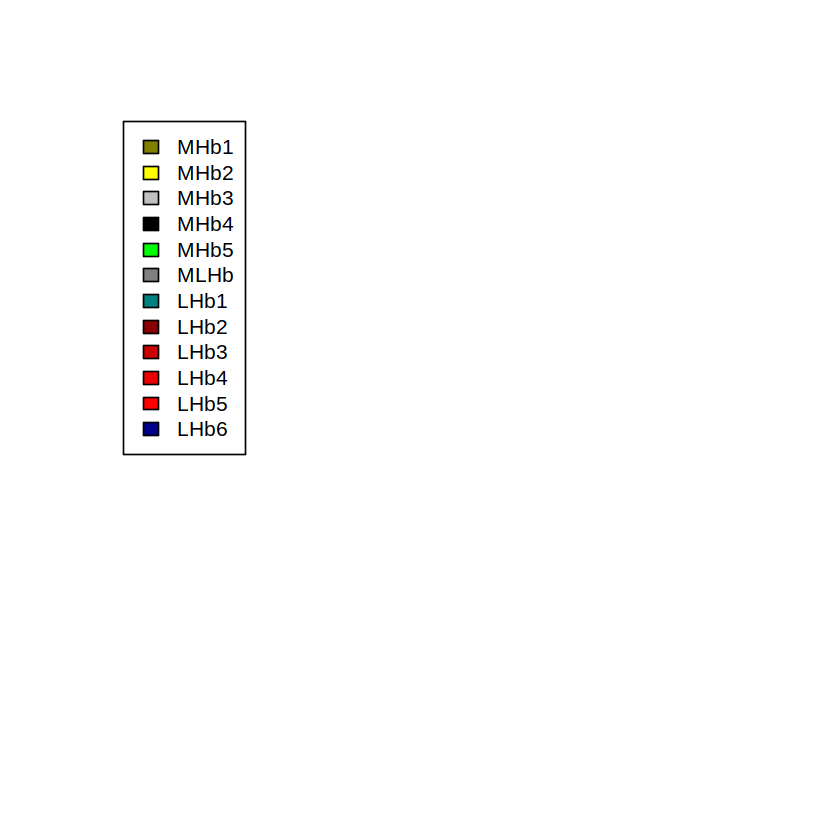

In [5]:
colVars <- list(CellType=setNames(c( "#808000","yellow","#C0C0C0","black", "#00FF00", "#808080", "#008080", "red4","red3", "red2", "red1", "darkblue"), 
  c("MHb1","MHb2","MHb3","MHb4","MHb5","MLHb","LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")))
saveRDS(colVars, file="int/colVars.Rds")
plot.new(); legend(0,1, fill=colVars$CellType, legend=names(colVars$CellType))


In [7]:
library(SCENIC)
org="mgi" # or hgnc, or dmel
dbDir="/media/garret/New Volume/scRNAseq_data/Koichi/DB" # RcisTarget databases location
myDatasetTitle="SCENIC example on Mouse brain" # choose a name for your analysis
scenicOptions <- initializeScenic(org=org, dbDir=dbDir, datasetTitle=myDatasetTitle, nCores=10) # I may need to use 4

Motif databases selected: mm9-500bp-upstream-7species.mc9nr.feather, mm9-tss-centered-10kb-7species.mc9nr.feather


In [15]:
getwd()

[1] "/home/garret/Documents/R code/SCENIC/SCENIC_HB_neuron"

In [16]:
scenicOptions@inputDatasetInfo$cellInfo <- "int/cellInfo.Rds"
scenicOptions@inputDatasetInfo$colVars <- "int/colVars.Rds"

# Save to use at a later time...
saveRDS(scenicOptions, file="int/scenicOptions.Rds") 

In [19]:
genesKept <- geneFiltering(exprMat, scenicOptions= scenicOptions, minCountsPerGene = 3 * 0.01 *
  ncol(exprMat), minSamples = ncol(exprMat) * 0.01)

Maximum value in the expression matrix: 8.27513453023812
Ratio of detected vs non-detected: 0.11
Number of counts (in the dataset units) per gene:


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00    22.42   272.39   873.29   973.77 34754.11 


Number of cells in which each gene is detected:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    18.0   215.0   565.3   746.8  5557.0 



Number of genes left after applying the following filters (sequential):
	10022	genes with counts per gene > 166.74
	10022	genes detected in more than 55.58 cells
	9053	genes available in RcisTarget database


In [21]:
exprMat_filtered <- exprMat[genesKept, ]
dim(exprMat_filtered)
rm(exprMat)

[1] 9053 5558

In [22]:
corrMat <- cor(t(exprMat_filtered), method="spearman")
saveRDS(corrMat, file=getIntName(scenicOptions, "corrMat"))


In [23]:
# Run GENIE3
runGenie3(exprMat_filtered, scenicOptions)

Warning message in split.default(sort(rownames(exprMat)), 1:nParts):
“data length is not a multiple of split variable”Running GENIE3 part 1
Running GENIE3 part 2
Running GENIE3 part 3
Running GENIE3 part 4
Running GENIE3 part 5
Running GENIE3 part 6
Running GENIE3 part 7
Running GENIE3 part 8
Running GENIE3 part 9
Running GENIE3 part 10


In [24]:
getwd()

[1] "/home/garret/Documents/R code/SCENIC/SCENIC_HB_neuron"

In [4]:
library(SingleCellExperiment)
library(data.table)
#setwd("SCENIC_MPOA_AM_P35M_neurons")
load("data/sceMouseBrain.RData")
exprMat <- counts(sceMouseBrain) 
# Optional: log expression (for TF expression plot, it does not affect any other calculation)
#exprMat <- log2(exprMat+1)
dim(exprMat)

library(SCENIC)
library("BiocParallel") # require function "register"

scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose <- TRUE
scenicOptions@settings$nCores <- 6# defauexprMat <- counts(sceMouseBrain) 
# Optional: log expression (for TF expression plot, it does not affect any other calculation)
#exprMat <- log2(exprMat+1)
dim(exprMat)

library(SCENIC)
library("BiocParallel") # require function "register"

scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose # lt is 20 
scenicOptions@settings$seed <- 123
library(BiocParallel) 
registered()

[1] 17726  5558

[1] 17726  5558

[1] TRUE

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bpRNGseed: 
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bpRNGseed: 
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: TRUE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bplogdir: NA


In [9]:
scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose <- TRUE
scenicOptions@settings$nCores <- 6 # default is 20 
scenicOptions@settings$seed <- 123
library(BiocParallel) 
registered() # your current settings
register(MulticoreParam(workers=4), default = TRUE) 
#register(SnowParam(workers=1), default = FALSE)
#register(SerialParam(), default = TRUE)
system.time(bplapply(1:1000, sqrt))
registered()


$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bpRNGseed: 
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bpRNGseed: 
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: TRUE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bplogdir: NA


   user  system elapsed 
  0.024   0.061   0.149 

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 4; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bpRNGseed: 
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bpRNGseed: 
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: TRUE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bptimeout: 2592000; bpprogressbar: FALSE; bpexportglobals: TRUE
  bplogdir: NA


In [10]:
library(SCENIC)
org="mgi" # or hgnc, or dmel
dbDir="/media/garret/New Volume/scRNAseq_data/Koichi/DB" # RcisTarget databases location
myDatasetTitle="SCENIC example on Mouse brain" # choose a name for your analysis
scenicOptions <- initializeScenic(org=org, dbDir=dbDir, datasetTitle=myDatasetTitle, nCores=10) # I may need to use 4

Motif databases selected: mm9-500bp-upstream-7species.mc9nr.feather, mm9-tss-centered-10kb-7species.mc9nr.feather


In [ ]:
#BiocParallel::register(BiocParallel::SerialParam())
runSCENIC_1_coexNetwork2modules(scenicOptions)
#install.packages("rstan")
library("rstan")
runSCENIC_2_createRegulons(scenicOptions)

16:43	Creating TF modules
Number of links between TFs and targets: 3583798


In [ ]:
runSCENIC_3_scoreCells(scenicOptions, exprMat)

In [5]:
library(SCENIC)

In [6]:
regulons <- loadInt(scenicOptions, "regulons")

In [7]:
str(regulons)

List of 303
 $ Ar               : chr [1:13] "6330416G13Rik" "Bdnf" "Caln1" "Clmn" ...
 $ Atf2             : chr [1:7] "Atf2" "Brd1" "Cacna1d" "Dgkg" ...
 $ Bbx              : chr [1:6] "Bivm" "Cln3" "Dpf3" "Man2a1" ...
 $ Bclaf1           : chr [1:1678] "0610030E20Rik" "1110004E09Rik" "1110008F13Rik" "1110037F02Rik" ...
 $ Bhlhe40          : chr [1:7] "Akap12" "Bhlhe40" "Elmo1" "Osbpl8" ...
 $ Bhlhe41          : chr [1:4] "Bhlhe41" "Gnb1" "Gsk3b" "Kdm6b"
 $ Cbfa2t2          : chr [1:4] "A830018L16Rik" "Fjx1" "Gpr149" "Tmem150a"
 $ Cebpg            : chr [1:3] "Ass1" "Cebpg" "Prlr"
 $ Cebpz            : chr [1:4] "Dab1" "Ggct" "Mpped1" "Spag7"
 $ Chd2             : chr [1:317] "1110051M20Rik" "1810032O08Rik" "2310035C23Rik" "2810006K23Rik" ...
 $ Churc1           : chr [1:4] "Cartpt" "Nr1d1" "St7" "Zbtb10"
 $ Creb1            : chr [1:4] "Bzrap1" "Fam63a" "Mamld1" "Nfia"
 $ Ctcf             : chr [1:8] "2410002F23Rik" "Bean1" "Gls2" "Hist1h1c" ...
 $ Cux1             : chr [1:6] "Cdkal